In [3]:
from sklearn.datasets import load_digits
from sklearn.linear_model import Perceptron
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
#first type of class, NO super parent classew
class Line():
    def __init__(self, p):
        self.p1 = p[0]
        self.p2 = p[1]
        self.slope = (self.p1[1]-self.p2[1])/(self.p1[0]-self.p2[0])
        self.b = self.p1[1]-self.slope*self.p1[0]
    def calculate(self,x):
        return self.slope*x+self.b
    def plot(self):
        x = np.random.uniform(-1,1,10)
        plt.plot(x,self.calculate(x))
    def find_actual_y(self,points):
        return [np.sign(self.calculate(p[0]) - p[1]) for p in points]
#             if self.calculate(p[0]) > p[1]:
#                 k.append(1)
#             else:
#                 k.append(-1)

class model():
    def __init__(self):
        self.weights = np.zeros(3) # 1 for threshold
    def predict_from_point(self, point):
        val = np.dot(point, self.weights)
        return np.sign(val)
    def adjust_weights(self, point,y):
        point = [1]+list(point) #1 for threshold
        if y == self.predict_from_point(point):
            return True
        else:
            self.weights = self.weights + np.multiply(y, point) #can change threshold too
            return False
class plot():
    def pla_plot(self,x):
        w0 = self.clf.weights[0]
        w1 = self.clf.weights[1]
        w2 = self.clf.weights[2]
        return (-w0-(x*w1))/w2
    def plot(self):
        k = np.concatenate([np.array(self.points),np.array(self.y).reshape(-1,1)],axis=1)
        df = pd.DataFrame(k, columns = ["p1","p2","y"])
        plt.scatter(df[df["y"]==-1].p1,df[df["y"]==-1].p2, color="r")
        plt.scatter(df[df["y"]==1].p1,df[df["y"]==1].p2, color="g")
        plt.plot([-1,1],[self.line.slope*x +self.line.b for x in [-1,1]], label="real split")
        plt.plot([-1,1],[self.pla_plot(x) for x in [-1,1]], label="pla split")
        plt.plot([-1,1],[0,0], label="initial pla split")
        plt.legend()
        plt.xlim([-1, 1])
        plt.ylim([-1, 1])
        
class create_test(plot):
    def __init__(self,num):
        
        self.create_line()
        
        #create points and real vals
        self.num = num
        self.points = [np.random.uniform(-1.0,1.0,2) for x in range(self.num)]
        self.y = self.line.find_actual_y(self.points)
        
        
        #run model
        self.clf = model()
        self.run_test()
        self.plot()
    def create_line(self):
        p = [np.random.uniform(-1.0,1.0,2) for x in range(2)]
        while p[0][0] == p[1][0] and p[0][1] == p[1][1]:
            p = [np.random.uniform(-1.0,1.0,2) for x in range(2)]
        self.line = Line(p)
        
    def run_test(self):
        self.num_iter = 0
        while True:
            self.num_iter += 1
            val = random.randint(0,self.num-1)
            acc = self.clf.adjust_weights(self.points[val],self.y[val])
            if acc:
                #check if all are accurate if it comes back as true for random point, if so then stop
                for val in range(self.num):
                    acc = self.clf.adjust_weights(self.points[val],self.y[val])
                    if not acc:
                        self.num_iter += 1
                        break 
                if acc:
                    break
        print(self.clf.weights)
            
                
    
    def f_not_equal_g(self):
        false = 0
        for x in range(100):
            p = np.random.uniform(-1.0,1.0,2)
            y = find_actual_y(p)
            pred = np.sign(np.dot(point, self.clf.weights))
            if y != pred:
                false += 1
        return false/1000
    

In [107]:
class Line():
    def __init__(self, p):
        self.p1 = p[0]
        self.p2 = p[1]
        self.slope = (self.p1[1]-self.p2[1])/(self.p1[0]-self.p2[0])
        self.b = self.p1[1]-self.slope*self.p1[0]
        super().__init__()
    def calculate(self,x):
        return self.slope*x+self.b
    def plot(self):
        x = np.random.uniform(-1,1,10)
        plt.plot(x,self.calculate(x))
    def find_actual_y(self,points):
        return [np.sign(self.calculate(p[0]) - p[1]) for p in points]
#             if self.calculate(p[0]) > p[1]:
#                 k.append(1)
#             else:
#                 k.append(-1)

class Model():
    def __init__(self):
        self.weights = np.zeros(3) # 1 for threshold
    def predict_from_point(self, point):
        val = np.dot(point, self.weights)
        return np.sign(val)
    def adjust_weights(self, point,y):
        point = [1]+list(point) #1 for threshold
        if y == self.predict_from_point(point):
            return True
        else:
            self.weights = self.weights + np.multiply(y, point) #can change threshold too
            return False
class Plot():
    def pla_line(self,x):
        w0 = self.weights[0]
        w1 = self.weights[1]
        w2 = self.weights[2]
        return (-w0-(x*w1))/w2
    def plotPLA(self):
        k = np.concatenate([np.array(self.points),np.array(self.y).reshape(-1,1)],axis=1)
        df = pd.DataFrame(k, columns = ["p1","p2","y"])
        plt.scatter(df[df["y"]==-1].p1,df[df["y"]==-1].p2, color="r")
        plt.scatter(df[df["y"]==1].p1,df[df["y"]==1].p2, color="g")

        plt.plot([-1,1],[self.slope*x +self.b for x in [-1,1]], label="real split")
        plt.plot([-1,1],[self.pla_line(x) for x in [-1,1]], label="pla split")
        plt.plot([-1,1],[0,0], label="initial pla split")
        plt.legend()
        plt.xlim([-1, 1])
        plt.ylim([-1, 1])
        
class create_test(Line, Model, Plot):
    def __init__(self,num):
        
        self.create_line()
        
        #create points and real vals
        self.num = num
        self.points = [np.random.uniform(-1.0,1.0,2) for x in range(self.num)]
        self.y = self.find_actual_y(self.points)
        
        
        self.run_test()
        self.f_not_equal_g()
        self.plotPLA()
        
    def create_line(self):
        p = [np.random.uniform(-1.0,1.0,2) for x in range(2)]
        while p[0][0] == p[1][0] and p[0][1] == p[1][1]:
            p = [np.random.uniform(-1.0,1.0,2) for x in range(2)]
        super().__init__(p)
        
    def run_test(self):
        self.num_iter = 0
        while True:
            val = random.randint(0,self.num-1)
            acc = self.adjust_weights(self.points[val],self.y[val])
            if acc:
                #check if all are accurate if it comes back as true for random point, if so then stop
                for val in range(self.num):
                    if self.predict_from_point(self.points[val])!= self.y[val]:
                        acc = False
                        break 
                if acc:
                    break
            else:
                self.num_iter += 1 # only add iteration if not True because otherwise it did not adjust at all and was already done
            
                
    
    def f_not_equal_g(self):
        self.false = 0
        for x in range(1000):
            point = np.random.uniform(-1.0,1.0,2)
            y = self.find_actual_y([point])
            pred = np.sign(np.dot(np.concatenate([[1],point]), self.weights))
            if y != pred:
                self.false += 1
        self.false = self.false/1000
    

In [108]:
class run_experiment():
    def __init__(self,N, E):
        self.N = N
        self.E = E
        self.run()
    def run(self):
        iters = []
        disagrees = []
        for x in range(self.E):
            test = create_test(self.N)
#             print("Num Iter", test.num_iter)
#             print("Disagree", test.false)
            iters.append(test.num_iter)
            disagrees.append(test.false)
        self.num_iters = np.mean(iters)
        self.false_prob = np.mean(disagrees)
            

[ 2.          0.22180457 -0.1085663 ]


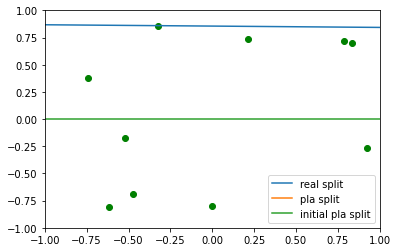

In [104]:
run_experiment(10,1)

In [91]:
score = []
num_iter = []
for val in range(1000):
    X = [[random.randint(0,1)] for x in range(10)]
    y = [random.randint(0,1) for x in range(10)]
    if len(np.unique(np.array(y)))==1:
        continue
    clf = Perceptron(random_state=0)
    clf.fit(X, y)
    score.append(1-clf.score(X, y))
    num_iter.append(clf.n_iter_)

In [133]:


test_run(10,100)
test_run(100,10)


For N = 10, convergence took on average 8.38 iterations
For N = 10, probability of disagreeing with target function on average is 0.10783999999999999
For N = 100, convergence took on average 177.9 iterations
For N = 100, probability of disagreeing with target function on average is 0.008100000000000001
